In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
import csv

In [8]:
df = pd.read_csv('train.csv')
df.tail()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.0,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.0,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN
300,428,open,seoul,79,20011017,NaN,traditional_hospital,1.340971e+09,8.108450e+08,5.043409e+08,...,5.349000e+09,3.123072e+09,0.0,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.0,15.0,same


In [21]:
with open('train.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    header = next(csv_reader)
    
    all_hos = []
    close_hos = []
    
    for row in csv_reader:
        if row[15] != 'NA':
            all_hos.append(int(row[15]))
        if row[15] != 'NA':
            if row[1] == ' close':
                close_hos.append(int(row[15]))
    
    avg_all = round(sum(all_hos) / len(all_hos))
    avg_close = round(sum(close_hos) / len(close_hos))

    print('모든 병원 평균 순이익: ', '{:,}'.format(avg_all), '원')
    print('폐업 병원 평균 순이익: ', '{:,}'.format(avg_close), '원')


모든 병원 평균 순이익:  210,170,013 원
폐업 병원 평균 순이익:  4,120,362 원


{'whiskers': [<matplotlib.lines.Line2D at 0x2ba064ef520>,
 'caps': [<matplotlib.lines.Line2D at 0x2ba064efbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ba064ef1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ba065012e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ba06501640>],
 'means': []}

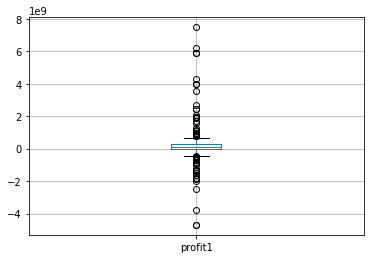

In [23]:
df.boxplot(column='profit1', return_type='dict')

In [54]:
def test(x):
    return x + 100
print(test(10))

110


In [55]:
(lambda x: x + 100)(10)

110

In [56]:
y = 10
(lambda x: x + y)(100)

110

In [57]:
#lst [1, 2, 3] 생성
lst = list(range(1, 4))
print(lst)

#map은 for문과 비슷; list안의 원소를 하나씩 가져와서 test 함수의 인자로 전달
list(map(test, lst))

[1, 2, 3]


[101, 102, 103]

In [58]:
#range 타입을 넣어도 수행 가능
list(map(lambda x: x + 100, range(1, 4)))

[101, 102, 103]

In [45]:
#1~10 숫자를 담고 있는 lst_test 생성
lst_test = list(range(1, 11))
print(lst_test)

list(map(lambda x: str(x) if x % 3 == 0 else x, lst_test))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


[1, 2, '3', 4, 5, '6', 7, 8, '9', 10]

In [47]:
#list(map(lambda x: str(x) if x % 3 == 0 else x, lst_test)) 람다식 풀어쓰기
result = []

def test_f1(x):
    if x % 3 == 0:
        x = str(x)
        result.append(x)
    else: 
        x = x
        result.append(x)

for num in lst_test:
    test_f1(num)
        
print(result)

[1, 2, '3', 4, 5, '6', 7, 8, '9', 10]


In [48]:
#1~10 숫자를 담고 있는 lst_test 생성
lst_test = list(range(1, 11))
print(lst_test)

list(map(lambda x: str(x) if x == 1 else float(x) if x == 2 else x + 100, lst_test))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


['1', 2.0, 103, 104, 105, 106, 107, 108, 109, 110]

In [49]:
#람다식 풀어쓰기
result = []

def test_f2(x):
    if x == 1:
        x = str(x)
        result.append(x)
    elif x == 2: 
        x = float(x)
        result.append(x)
    else:
        x += 100
        result.append(x)

for num in lst_test:
    test_f2(num)
        
print(result)

['1', 2.0, 103, 104, 105, 106, 107, 108, 109, 110]


In [75]:
a = list(range(1, 6))     #[1, 2, 3, 4, 5]
b = list(range(2, 11, 2)) #[2, 4, 6, 8, 10]

list(map(lambda x, y: x * y, a, b))

[2, 8, 18, 32, 50]

In [71]:
lst = list(range(6, 16))
print(lst)
list(map(lambda x: x if x > 5 and x < 10 else 0, lst))

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


[6, 7, 8, 9, 0, 0, 0, 0, 0, 0]

In [74]:
lst = list(range(6, 16))
print(lst) #6~15까지 숫자가 들어간 리스트

def fnc(x):
    return x > 5 and x < 10
list(filter(fnc, lst))

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


[6, 7, 8, 9]